# Movie Review Sentiment Classifier

>This notebook presents a **sentiment classification** project using the IMDB movie reviews dataset, which contains 50,000 labeled reviews categorized as positive or negative.
>Text data is preprocessed and transformed using  **TF-IDF vectorization** and three machine learning models are trained: **Logistic Regression, Naive Bayes, and Support Vector Classifier (SVC)**.
>**Gradio** is used to provide a simple interface that allows users to input movie reviews and see predicted sentiments from each classifier in real-time.


## Necessary Imports

Let's start by importing core libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

## Loading the Data

The dataset downloaded from [here](https://colab.research.google.com/drive/1V75FryE0xji_vOXr9MX0tI6w76GqITwQ#scrollTo=UjCgQJ10N6Dz&line=1&uniqifier=1)

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

The reviews are quite long, proper preprocessing is needed

## Exploratory Data Analysis

In [ ]:
df.shape

(50000, 2)

dataset is good-sized - enough to train reliable models

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
print(df.duplicated().sum())

418


duplicates may bias the model, need to be dropped

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49582, 2)

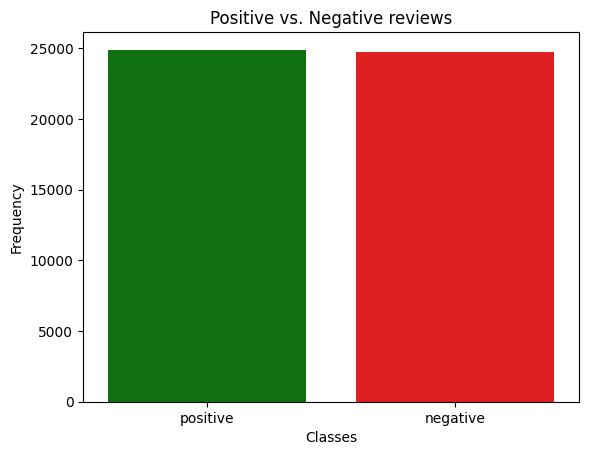

In [ ]:
sns.countplot(x='sentiment', hue='sentiment', data =df, palette=['green', 'red'])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Positive vs. Negative reviews')
plt.show()

target classes are balanced which is important for training a reliable classifier

In [ ]:
df['review_length_words'] = df['review'].apply(lambda x: len(x.split()))

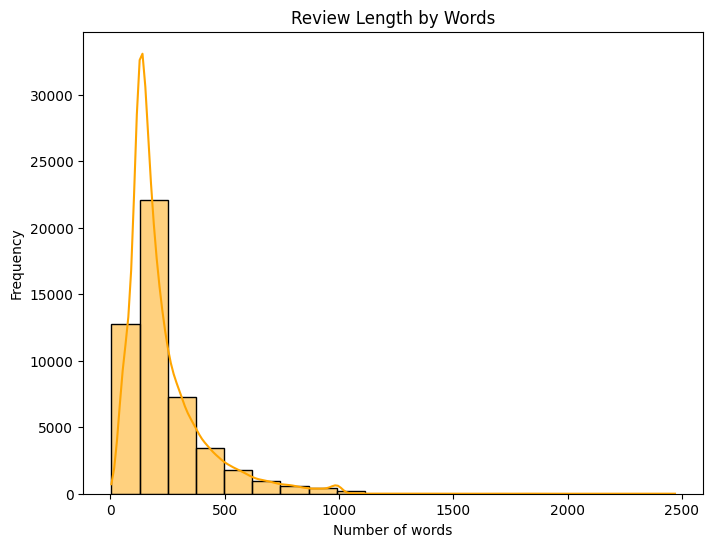

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length_words'], bins=20, kde=True, color='orange')
plt.title('Review Length by Words')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

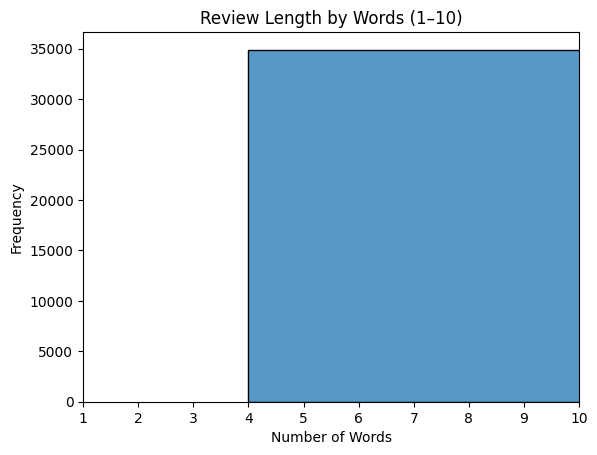

In [ ]:
sns.histplot(df['review_length_words'], bins=10)
plt.title('Review Length by Words (1–10)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(1, 10)
plt.show()

there are no very short reviews (up to 3 words), which could be somewhat uninformative

In [ ]:
df.loc[(df['review_length_words'] >= 4) & (df['review_length_words'] <= 10), ['review', 'sentiment']]

,review,sentiment
11926,I wouldn't rent this one even on dollar rental night.,negative
13109,"More suspenseful, more subtle, much, much more disturbing....",negative
18400,Brilliant and moving performances by Tom Courtenay and Peter Finch.,positive
19874,This movie is terrible but it has some good effects.,negative
27521,"Read the book, forget the movie!",negative
28920,Primary plot!Primary direction!Poor interpretation.,negative
31072,"What a script, what a story, what a mess!",negative
40817,I hope this group of film-makers never re-unites.,negative


check if there are reviews that include expressions such as "not good, not impressing etc." where 2 and more words should be interpreted together to get the correct tone, because TF-IDF which will be used for vectorizing works with unigrams by default so cannot capture the negation, in that case TF-IDF should work with n-grams

In [ ]:
df[df['sentiment'] == 'positive']['review'].sample(3)

,review
20636,"Brian De Palma's undeniable virtuosity can't really camouflage the fact that his plot here is a thinly disguised ""Psycho"" carbon copy, but he does provide a genuinely terrifying climax. His ""Blow Out"", made the next year, was an improvement."
201,"Any film about WWII made during WWII by a British production company has no latter-day peer in my opinion, respectfully. The confluence of so many things near and dear to my heart are in At Dawn We Dive: as a descendant of Admiral Horatio Nelson and student of all aspects of World War Two and particularly naval warfare, I favor depictions of subs and action in the North Atlantic and especially those which include the German side of things. For those unacquainted with target priorities, an attack on an enemy warship is the greatest event that a submarine can hope to encounter and such a rare opportunity would develop surprisingly similarly to what we see here. The pacing is deliberate and typical of the works coming out of the Ealing, Rank and British-Gaumont studios back in the day: frankly I prefer its quieter, more cerebral approach for its humanity and realism that engages far better than any over-produced Hollywood movie ever could. This reminds me of Powell and Pressburger's The 49th Parallel thanks to the powerfully persuasive Eric Portman, a favorite of mine. John Mills receives second billing and a smaller font in the titles, so this is clearly meant to be Mr. Portman's film but the whole cast shines. As for the title sequence, am I the only one who is utterly charmed by Gainsborough Production's lovely pre-CGI Gainsborough Girl?"
7484,"Far more sprightly, and less stage and set bound than Gene Saks' previous efforts Barefoot in the Park(67) and The Odd Couple (68), Cactus Flower is not a work of art, but compared to most of the tired farces from the 60's like The Apartment, How to Murder Your Wife, Goodbye Charlie, A Guide for the Marrried Man, Divorce, American Style, Any Wednesday, Kiss Me Stupid, Boys Night Out, it's a masterpiece. Director Saks and writer I.A.L. Diamond have effectively ""opened up"" Abe Burrows' Broadway hit, and the film benefits greatly from New York City location shooting and excellent performances from Ingrid Bergman and Goldie Hawn. Bergman is charming, looks great, and demonstrates a flair for comedy. Hawn in her Oscar winning role has never been better or more appealing. Matthau is OK though it's hard to believe that Hawn's character would be so enamored of him. And in retrospect, Hawn's attempted suicide at the start of the film is out of character and unbelievable. Nonetheless, the film has a plausible farcical set up, and once it gets going it generates laugh. Rick Lenz, Jack Weston, Eve Bruce, and Vito Scotti provide good support. The film is likable and fun, and Hawn and Bergman make you care."


lots of **br** tags, lots of positive keywords

In [ ]:
df[df['sentiment']=='negative']['review'].sample(3)

,review
45568,"I figured the whole joke of the movie would be to see some rich white guy acting like Chris Rock, and then see Chris Rock react to people's reactions. Instead you just see Chris Rock being himself and people not understanding him. There are maybe 2 scenes in the entire movie where they use their gimmick. This should have been a lot better."
17324,"Enormous suspension of disbelief is required where Will's ""genius"" is concerned. Not just in math--he is also very well read in economic history, able to out-shrink several shrinks, etc etc. No, no, no. I don't buy it. While they're at it, they might as well have him wearing a big ""S"" on his chest, flying faster than a jet plane and stopping bullets.<br /><br />Among other problems...real genius (shelving for the moment the problem of what it really is, and whether it deserves such mindless homage) doesn't simply appear /ex nihilo/. It isn't ever so multi-faceted. And it is very rarely appreciated by contemporaries.<br /><br />Better to have made Will a basketball prodigy. Except that Damon's too short."
10699,"How has this piece of crap stayed on TV this long? It's terrible. It makes me want to shoot someone. It's so fake that it is actually worse than a 1940s sci-fi movie. I'd rather have a stroke than watch this nonsense. I remember watching it when it first came out. I thought, hey this could be interesting, then I found out how absolutely, insanely, ridiculously stupid it really was. It was so bad that I actually took out my pocket knife and stuck my hand to the table.<br /><br />Please people, stop watching this and all other reality shows, they're the trash that is jamming the networks and canceling quality programming that requires some thought to create."


## Train-Test Split

In [ ]:
X = df[['review']]
y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

since this is an NLP task, 9:1 split ratio was chosen to all the models to train on more data and better capture complex language patterns  

In [ ]:
print(X_train.shape, X_test.shape)

(44623, 1) (4959, 1)


## Preparing Reviews for Modeling





**Preprocessing steps to be applied:**

1. Remove html tags
2. Convert to lowercase
3. Remove unwanted punctuation and characters, expand contractions (e.g. dont' = do not)
4. Tokenization — split text into words (tokens)
5. Remove stopwords (common words like “the”, “is”, “and” that add little meaning)
6. Lemmatization or Stemming
7. Vectorization

In [ ]:
!pip install contractions

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import contractions
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
#remove html tags

def remove_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

def to_lower(text):
  return text.lower()

def expand_contractions(text):
  return contractions.fix(text)

def remove_noise(text):
  pattern = r'[^a-zA-Z0-9\s]'
  return re.sub(pattern, '', text)

def clean_text(text):
  text_no_tags = remove_tags(text)
  text_lower = to_lower(text_no_tags)
  text_expanded = expand_contractions(text_lower)
  text_cleaned = remove_noise(text_expanded)
  return text_cleaned

In [ ]:
X_train['review_cleaned'] = X_train['review'].astype(str).apply(clean_text)
X_test['review_cleaned'] = X_test['review'].astype(str).apply(clean_text)

In [ ]:
def tokenize_text(text):
  return word_tokenize(text, language='english', preserve_line=True)

X_train['review_tokenized'] = X_train['review_cleaned'].astype(str).apply(tokenize_text)
X_test['review_tokenized'] = X_test['review_cleaned'].astype(str).apply(tokenize_text)

In [ ]:
X_train[['review_cleaned', 'review_tokenized']].sample()

,review_cleaned,review_tokenized
1044,a good documentary reviewing the background behind our societies oil addiction the problem concerning our present energy usage and finally discusses the effects of the coming energy deficit originating from the peak oil production problemthis movie should be educated to all students as part of their education show it to your children parents relatives and friends they will thank you eventuallyafter reviewing the contents of this documentary and comparing its mentioned sources i would say that the facts in this movie are well scientifically supported,"[a, good, documentary, reviewing, the, background, behind, our, societies, oil, addiction, the, problem, concerning, our, present, energy, usage, and, finally, discusses, the, effects, of, the, coming, energy, deficit, originating, from, the, peak, oil, production, problemthis, movie, should, be, educated, to, all, students, as, part, of, their, education, show, it, to, your, children, parents, relatives, and, friends, they, will, thank, you, eventuallyafter, reviewing, the, contents, of, this, documentary, and, comparing, its, mentioned, sources, i, would, say, that, the, facts, in, this, movie, are, well, scientifically, supported]"


In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# negations should be kept
negations = {'no', 'nor', 'not'}
custom_stopwords = stop_words - negations

def remove_stopwords(tokens):
    return [word for word in tokens if word not in custom_stopwords]

X_train['review_tokenized'] = X_train['review_tokenized'].apply(remove_stopwords)
X_test['review_tokenized'] = X_test['review_tokenized'].apply(remove_stopwords)

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

X_train['review_tokenized'] = X_train['review_tokenized'].apply(lemmatize_tokens)
X_test['review_tokenized'] = X_test['review_tokenized'].apply(lemmatize_tokens)

In [ ]:
X_train[['review_tokenized', 'review_cleaned']].sample()

,review_tokenized,review_cleaned
31067,"[anyone, give, reason, one, american, die, movie, suppose, emotional, scene, yet, operation, delta, force, team, kill, hundred, russian, slowmotion, action, scene, thousand, arab, also, slowmotion, action, scene, suppose, cheer, say, take, nonamerican, monster, know, use, slowmotion, action, scene, lot, every, action, scene, movie, guess, slowmotion, every, last, one, squad, call, invincible, slowmotion, bulletdodging, force, since, seem, supernatural, power, help, dodge, bullet, supernatural, power, fails, kind, regeneration, superpower, need, kill, complete, nonamerican, army, stand, victory, point, nobody, care, since, put, sleep, another, laughable, slowmotion, action, scene, not, laugh, loud, bad, act, cheesy, dialogue, incredibly, poor, story, cast, make, unknown, actor, probably, ...]",can anyone give me a reason why only one american dies in this movie and when he does it is supposed to be a very emotional scene yet when the operation delta force team kills hundreds of russians in slowmotion action scenes or thousands of arabs also in slowmotion action scenes you are supposed to cheer and say take that you nonamerican monsters i know i used slowmotion action scenes a lot but that is because every action scene in this movie is in you guessed it slowmotion every last one of them and this squad should be called invincible slowmotion bulletdodging force since they seem to have supernatural powers that help them to dodge bullets and if this supernatural power fails they have some kind of regeneration superpower which is all they need to kill the complete nonamerican army that stands between them and victory by this point nobody cares since they have been put to sleep by another laughable slowmotion action scene that is if they are not laughing out loud at the bad acting cheesy dialogues and incredibly poor story which is what i did the cast is made of unknown actors which will probably remain unknown since they do not even play characters they are just playing guys with gunsand let us not forget superpowers the only quality is that the special effects are surprisingly not that badalthough they are in slowmotion for a tv movie but it still sucks and at the same time is so bad it is good ok maybe at the end it gets a little too repetitive25


### Vectorization

In [ ]:
X_train['review'] = X_train['review_tokenized'].apply(lambda tokens: ' '.join(tokens))
X_test['review'] = X_test['review_tokenized'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
X_train = X_train['review']
X_test = X_test['review']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)

(44623, 2834579) (4959, 2834579)


Features are ready for modeling, now target classes have to be converted to numerical form

### Label Encoding for Target Classes

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
print(y_train, y_test)

[0 1 1 ... 0 1 1] [0 1 0 ... 0 0 0]


## Modeling using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
model_lr =lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

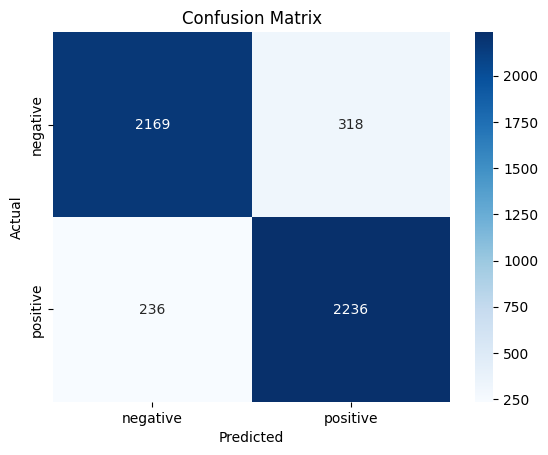

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      2487
    positive       0.88      0.90      0.89      2472

    accuracy                           0.89      4959
   macro avg       0.89      0.89      0.89      4959
weighted avg       0.89      0.89      0.89      4959

Accuracy: 0.8883


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['negative', 'positive']))

# 4. Print accuracy
acc = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc:.4f}")

the performance is very well, great balance between precision and recall

## Modeling with Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
model_nb = nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = model_nb.predict(X_test)

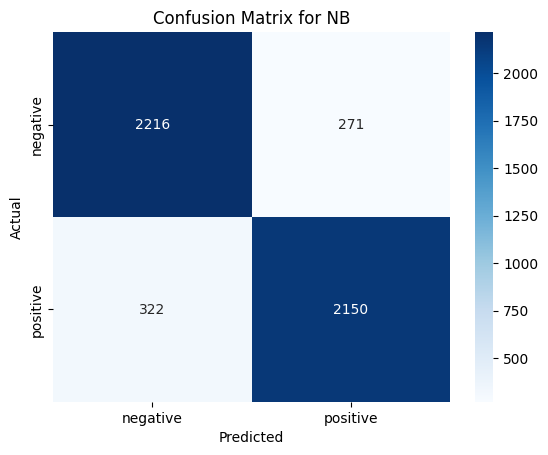

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for NB')
plt.show()


fewer TPs and TNs compared to Logistic Regression

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred_nb, target_names=['negative', 'positive']))

acc = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy {acc:.4f}')

Classification Report
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      2487
    positive       0.89      0.87      0.88      2472

    accuracy                           0.88      4959
   macro avg       0.88      0.88      0.88      4959
weighted avg       0.88      0.88      0.88      4959

Accuracy 0.8804


very balanced and powerful performance for both target classes, but slightly worse than Logistic Regression

## Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
model_svc = svc.fit(X_train, y_train)

In [ ]:
y_pred_svc = model_svc.predict(X_test)

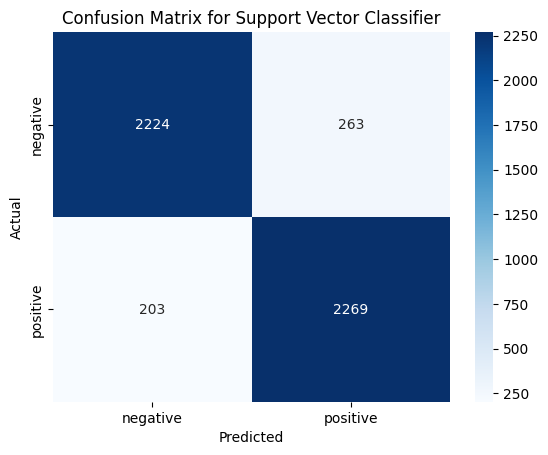

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

In [ ]:
print('Classificaiton Report')
print(classification_report(y_test, y_pred_svc, target_names=['negative', 'positive']))

acc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {acc:.4f}')

Classificaiton Report
              precision    recall  f1-score   support

    negative       0.92      0.89      0.91      2487
    positive       0.90      0.92      0.91      2472

    accuracy                           0.91      4959
   macro avg       0.91      0.91      0.91      4959
weighted avg       0.91      0.91      0.91      4959

Accuracy: 0.9060


even better than Logistic Regression!

## Classifying reviews from [TMDB]() using trained models

In [ ]:
import requests

API = "here goes your API key from TMDB"
movie_id = 500  #choose movie using id
url = f"https://api.themoviedb.org/3/movie/{movie_id}"
params = {'api_key': API,
          'language': 'en-US',
          'page': 1}


response = requests.get(url, params=params)
data = response.json()

response_movie = requests.get(url, params=params)
response_reviews = requests.get(url+'/reviews', params=params)
data_movie = response_movie.json()
data_reviews = response_reviews.json()
reviews = [review['content'] for review in data_reviews['results']]

In [ ]:
movie_title = data_movie.get('title', 'Unknown Title')
print(f'Fetched reviews for {movie_title}')

Fetched reviews for Reservoir Dogs


In [ ]:
def preprocessing_pipeline(text):
  text = clean_text(text)
  tokens = tokenize_text(text)
  tokens_cleaned = remove_stopwords(tokens)
  tokens_lemmatized = lemmatize_tokens(tokens_cleaned)
  return ' '.join(tokens_lemmatized)

In [ ]:
for i, review in enumerate(reviews):
  print(f'{i+1}. {review}')

1. This unique take on the heist-film-gone-wrong was excellent--stylish and intelligently made, yet very funny and inexpensive. Tarantino's accolades from giving American cinema the resuscitation it needed mirrors what has happened, at least since the 70's, with Martin Scorsese's 'Mean Streets', both in terms of entertaining violence and usage of music in the scoring of films. I greatly thank Harvey Keitel for taking a chance on Tarantino back then--It paid off in spades.
2. The cuss-oriented squabbles of lowlife crooks for 99 minutes (and no women)
	
RELEASED IN 1992 and written/directed by Quentin Tarantino, "Reservoir Dogs” is a crime drama/thriller about a diamond heist gone disastrously wrong in Los Angeles wherein the surviving thugs bicker back-and-forth in a warehouse about which of their members is a police informant. The main thieves are played by Harvey Keitel, Tim Roth, Steve Buscemi, Michael Madsen and Chris Penn while Lawrence Tierney appears as the old salt mastermind.



In [ ]:
preprocessed_review = [preprocessing_pipeline(reviews[0])]

In [ ]:
review_vector = vectorizer.transform(preprocessed_review)

In [ ]:
prediction = model_lr.predict(review_vector)
print(le.inverse_transform(prediction))

['positive']


the review #1 "This unique take on the heist-film-gone-wrong was excellent..." is classified as positive by Logistic Regression

## Let's add a quick interface using Gradio

In [ ]:
import gradio as gr

def predict_sentiment(review, model):
  review_cleaned = preprocessing_pipeline(review)
  review_vector = vectorizer.transform([review_cleaned])


  if model == "Logistic Regression":
    prediction = model_lr.predict(review_vector)
  elif model == "Naive Bayes":
    prediction = model_nb.predict(review_vector)
  elif model == "Support Vector Classifier":
    prediction = model_svc.predict(review_vector)
  else:
    raise ValueError("Unsupported model")

  return f"this review is {le.inverse_transform(prediction)[0]}"

In [ ]:
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=[
        gr.Textbox(lines=4, placeholder="Enter a movie review here..."),
        gr.Radio(["Logistic Regression", "Naive Bayes", "Support Vector Classifier"])],
        outputs="text",
        title="Movie Review Classifier",
        description="Enter a review and choose a model to see the predicted sentiment (positive or negative)")

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65701fa2afc2546dd3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
